#### Las siguientes son Notas sacadas del Capítulo 6 del libro
    
    Validated Numerics: A Short Introduction to Rigorous Computations
    Warwick Tucker

En la sección $6.2$ lo que queremos es resolver el problema de valores iniciales (IVP):
\begin{equation}
    \left\{
        \begin{array}{ll}
            \dot{x}(t)=f(x(t)), \hspace{1cm} t \in [0,T'] \\
            x(0)=x_0.
        \end{array}
    \right.
\end{equation}

Para lo cual partimos de suponer que conocemos una extensión de intervalo $\Psi$ talque $x(t) \in \Psi(t)$ para toda $t \in [0,T']$. Esto se puede traducir a que:

\begin{equation}
    x(t) \in x_0 + \int_0^t F\left(\Psi(s)\right)ds 
\end{equation}

Donde $F$ es la extensión de intervalo de $f$. Por lo que al final no debemos probar que $x(t) \in \Psi(t)$ sino que

\begin{equation}
    x_0 + \int_0^t F\left(\Psi(s)\right)ds \subseteq \Psi(t) , \hspace{1cm} t \in \left[0,T'\right]
\end{equation}

Cito textualmente:

    "If this condition holds, it follows by Brouwer’s fixed point theorem (Theorem A.12) that the enclosure Ψ(t) contains at least one fixed point of the integral operator (6.6). This means that it indeed encloses at least one solution to the IVP (6.4)."

Por otro lado esta condición tambien implica que $\Psi^{(k+1)} \subseteq \Psi^{(k)}$ donde los ordenes de las $\Psi$'s están dados por:

\begin{align}
    \Psi^{(0)}(t)&=\Psi(t) \\
    \Psi^{(k+1)}(t)&= x_0 + \int_0^t F\left(\Psi^{(k)}(s)\right)ds
\end{align}

En un punto de partida muy sencillo podemos suponer que vamos a tomar intervalos constantes $\Psi^{(k)}(t)=\mathbf{z}^{(k)}$. De modo que las $\mathbf{z}$'s anidadas sean:

\begin{equation}
    \mathbf{z}^{(k+1)}(t)= x_0 + \int_0^t F(\mathbf{z}^{(k)})ds = x_0 + \left[0,T'\right] \times F(\mathbf{z}^{(k)})
\end{equation}

Estos rectángulos son cotas demasiado grandes, podemos reducirlo a triángulos de modo que 

\begin{equation}
    x(t) \in x_0 + t F(\mathbf{z}^{(k)})
\end{equation}

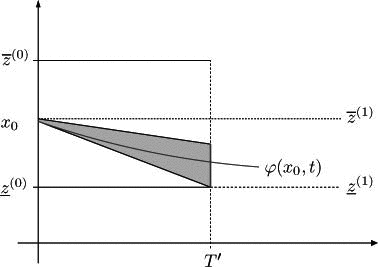

In [1]:
using Images
cadena="/home/santiago/Documentos/Libros/Fisica/Métodos Numéricos/Warwick_Tucker_Validated_Numerics_A_Short_IntroBookZZ.org.epub_FILES/OPS/images/f0109-01.jpg"
imread(cadena)

In [1]:
using PyPlot
using Intervalos

INFO: Loading help data...


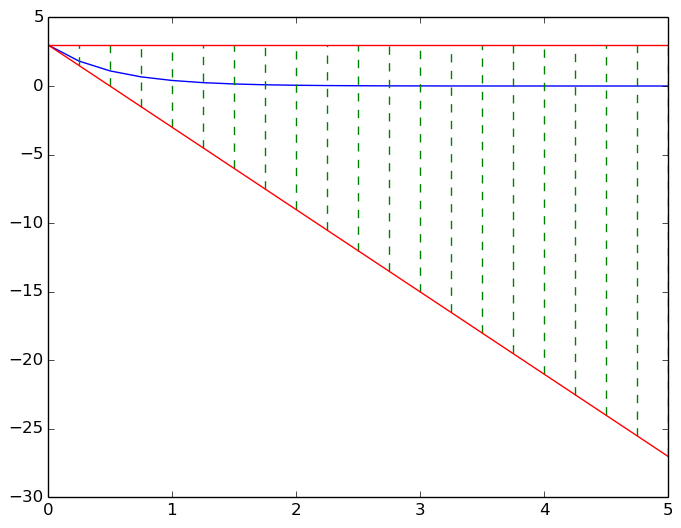

In [26]:
# d/dt x(t) = -2x(t) ; x(0)=3   →    x(t)= 3 exp(-2t)

f(x)= -2*x
x(t)=3*exp(-2*t)

t=0:2.0^-2:5

PyPlot.plot(t,x(t))

x0=Intervalo[]
x0Top=similar(t)
x0Bot=similar(t)
for i=1:length(t)
    push!(x0,3 + t[i]*f(Intervalo(0,3)))
    x0Top[i]=x0[i].b
    x0Bot[i]=x0[i].a
    PyPlot.plot(t[i]*[1,1],Float64[x0[i].a,x0[i].b],"--g")
end

PyPlot.plot(t,x0Top,"-r")
PyPlot.plot(t,x0Bot,"-r");